# Medidas de tendencia central, forma y dispersión

Vamos a comenzar con las medidas de tendencia central, para ello utilizaremos la los datos que incluidos dentro del dataset __cars__ incluidos en el R base. Este dataset presenta los resultados de realizar un experimento dónde se ha medido la distancia de frenado de un vehículo, dada su velocidad.

Vamos a echarle un vistazo en primer momento:

In [10]:
library(ggplot2)
library(dplyr)
attach(cars)

The following objects are masked from cars (pos = 3):

    dist, speed

The following objects are masked from cars (pos = 4):

    dist, speed



In [9]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [11]:
str(cars)

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


In [12]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

Analicemos las distancias de frenado:

In [13]:
dist_frenado <- cars$dist

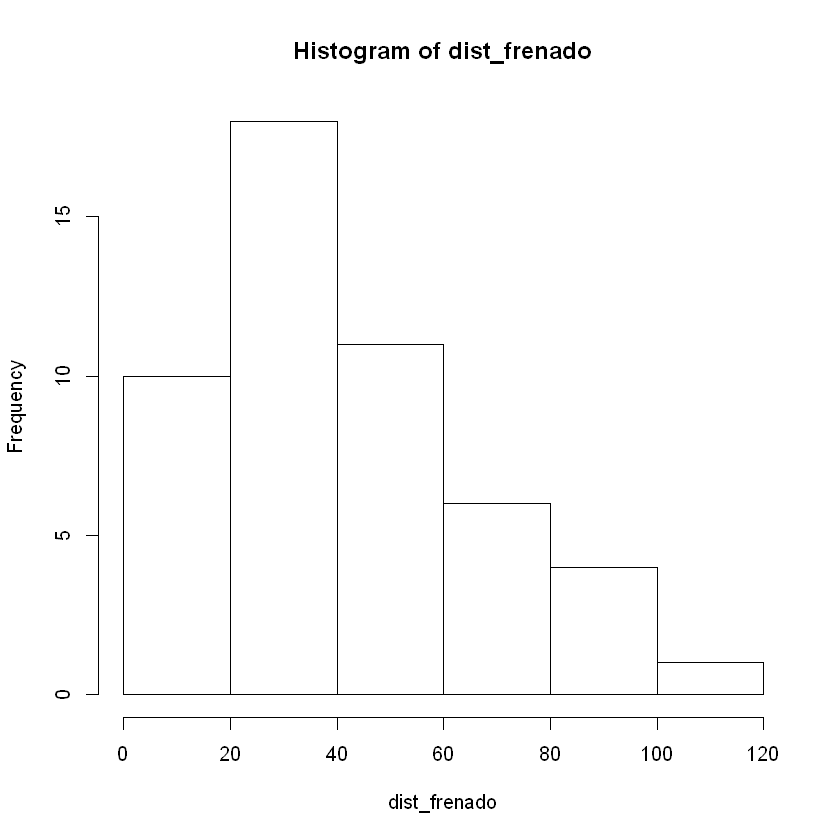

In [14]:
hist(dist_frenado)

## Medidas de tendencia central:

La primera medida de tendencia central que vamos a estudiar será la _media_:

In [9]:
mean(dist_frenado)

[1] 42.98

Hemos visto qué ocurre cuando a los valores se les suma una constante o se les multiplica, vamos a comprobarlo:

In [32]:
dist_frenado_suma <- dist_frenado + 10
mean(dist_frenado_suma)

[1] 52.98

In [33]:
dist_frenado_prod <- dist_frenado * 10
mean(dist_frenado_prod)

[1] 429.8

Para seguir obteniendo información estudiamos la _mediana_:

In [10]:
median(dist_frenado)

[1] 36

A partir de la diferencia entre la media y la mediana podemos empezar a obtener nuestras primeras conclusiones. 

__Ejercicio__

Comprobar qué ocurre al sumar o multiplicar valroes:

Hemos visto dibujando el histograma que la distribución está desplazada hacia la derecha, esto podrá ser analizado con los coeficientes de asimetría que vamos a estudiar a continuación, pero ahora mismo podemos analizar cómo el hecho de que  exista esta asimetría provoca que el valor de la media sea sensiblemente mayor que el de la mediana.

Vamos a realizar una visualización en la que podamos apreciar esto mejor, utilizando ggplot2:

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


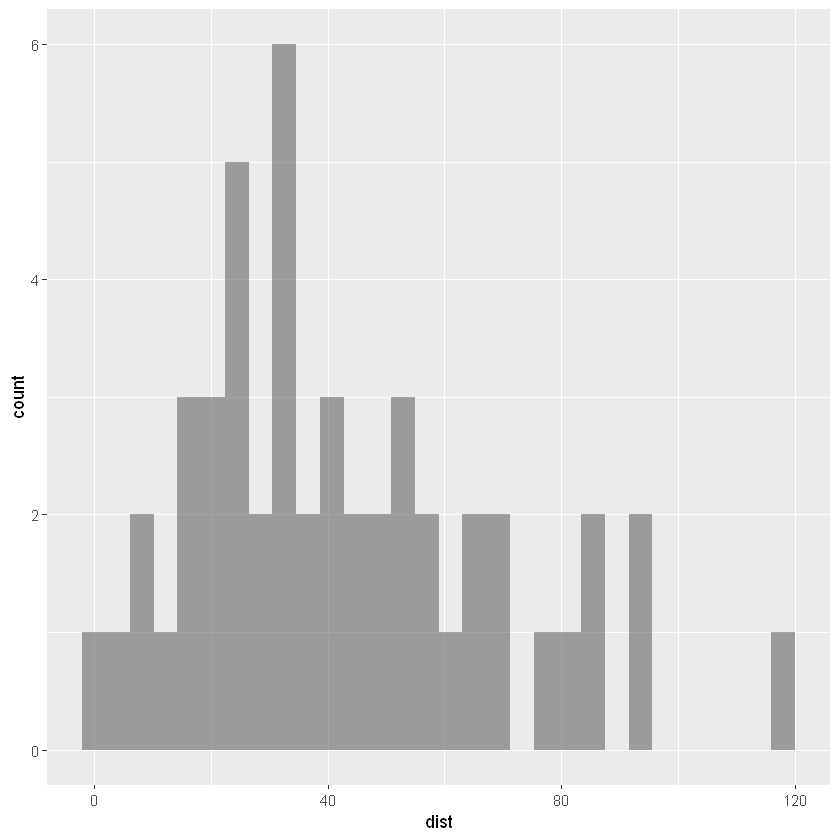

In [11]:
p1 <- ggplot(cars, aes(dist)) + geom_histogram(aes(alpha = 1), show_guide = FALSE) 
p1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


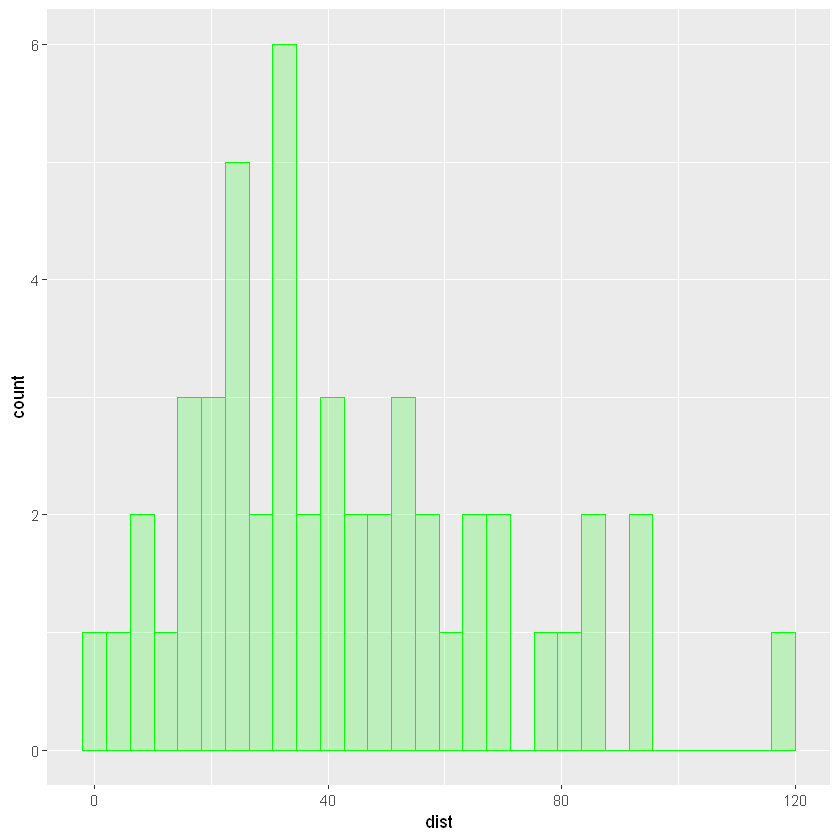

In [20]:
p2 <- ggplot(aes(x = dist), data = cars) + 
  geom_histogram(color = 'green', fill = 'green', alpha = 0.2) 
p2

In [21]:
p2 <- p2 + labs(title="Distancias de frenado")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


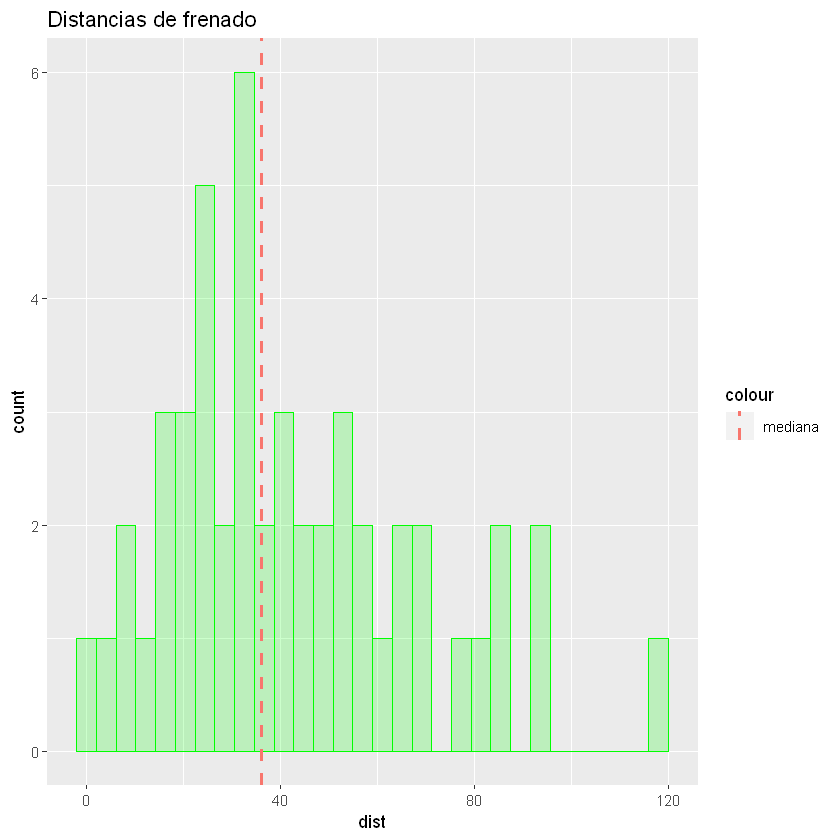

In [23]:
p2 <- p2 + geom_vline(aes(xintercept=median(cars$dist),
                 color="mediana"), linetype="dashed",
             size=1)
p2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


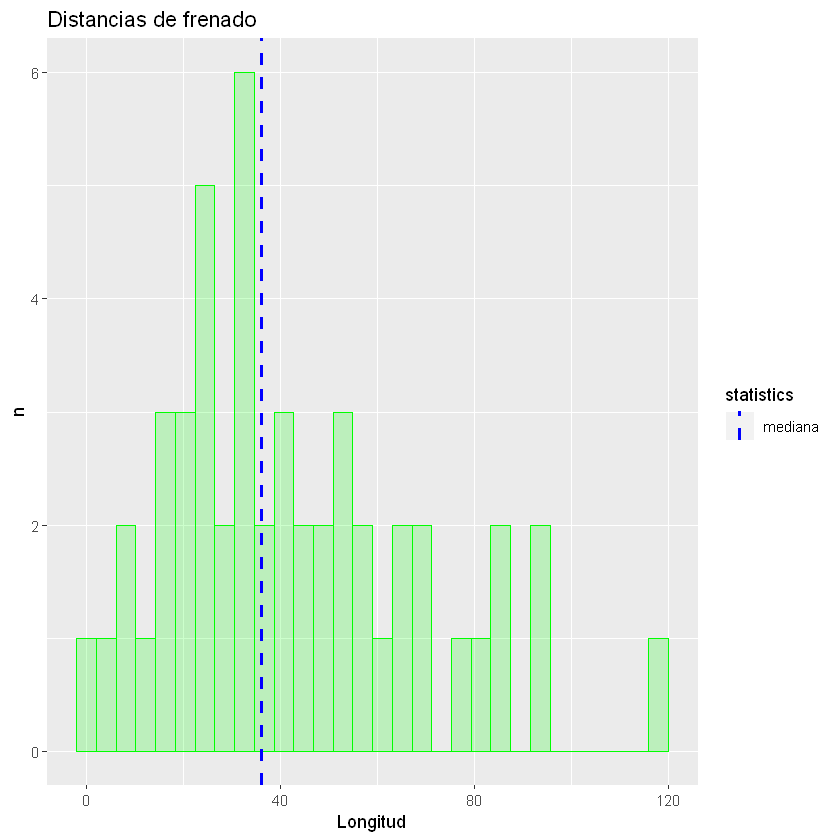

In [26]:
# corregimos la leyenda:

p2 + scale_color_manual(name = "statistics", values = c(mediana = "blue")) + xlab("Longitud") + ylab("n")

Vamos a añadir los cuantiles y la media:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


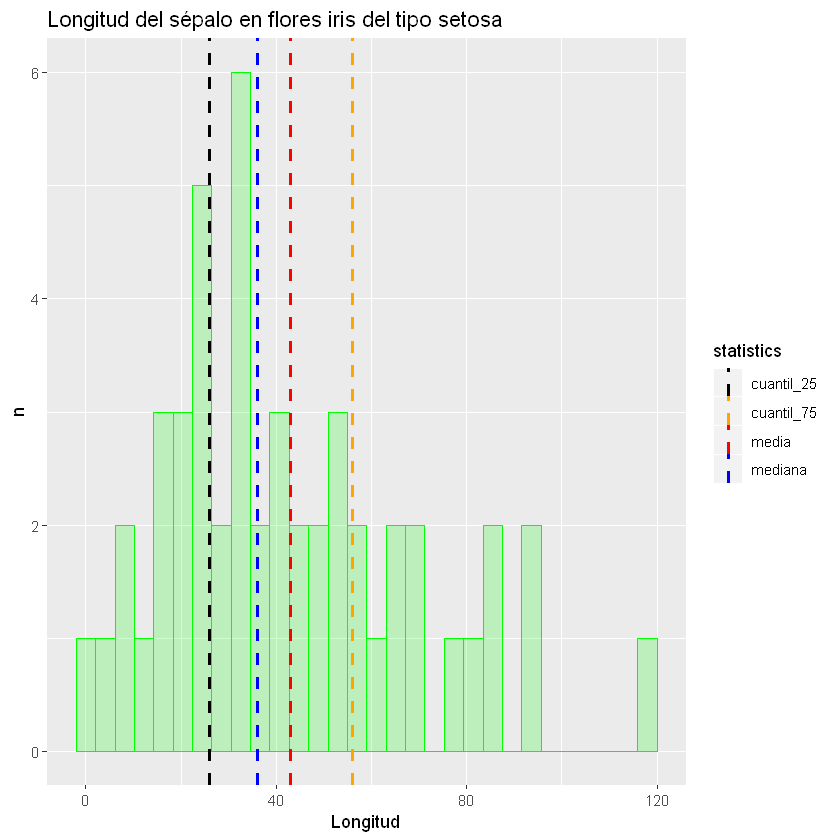

In [38]:
ggplot(aes(x = dist), data = cars) + 
  geom_histogram(color = 'green', fill = 'green', alpha = 0.2) +
  labs(title="Longitud del sépalo en flores iris del tipo setosa") +
  geom_vline(aes(xintercept=median(cars$dist),
                 color="mediana"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = mean(cars$dist),
                 color="media"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(cars$dist, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(cars$dist, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
  scale_color_manual(name = "statistics", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
  xlab("Longitud") + ylab("n")


Esta misma información también se puede visualizar con un boxplot

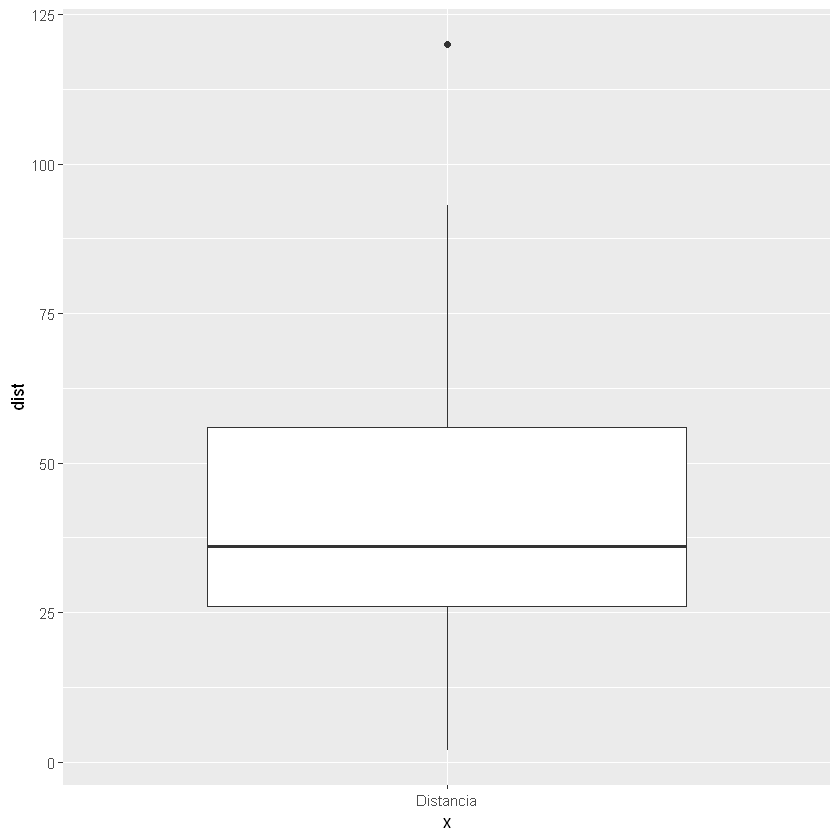

In [27]:
bplot <- ggplot(cars, aes(x = "Distancia", y = dist))
bplot + geom_boxplot()

La _moda_ no está implementada en el paquete básico de R, pero podemos utilizar una función creada por nosotros mismos para el cálculo de la misma:

In [47]:
moda <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [48]:
moda(dist_frenado)

[1] 26

A partir de todo lo que hemos analizado podemos sacar diferentes conclusiones sobre la forma de la distribución:

* Conclusión 1: gracias al histograma, y viendo que la mediana es menor que la media podemos entender que existe una cola hacia la derecha de la distribución. Esto podremos analizarlo en detalle durante con las medidas de simetría.
* Conclusión 2: existe un _apelotonamiento_ de las medidas entre el primer cuantil y la mediana.
* Conclusión 3: debido a todo esto no parece que estemos ante una distribución normal.
* Conclusión 4: tenemos un dato atípico con una distancia de 120m.

## Medidas de dispersión

In [39]:
var(dist_frenado)

[1] 664.0608

[1] 664.0608

In [40]:
var(dist_frenado + 10)

[1] 664.0608

In [41]:
var(dist_frenado * 10)

[1] 66406.08

In [30]:
sd(dist_frenado)

[1] 25.76938

In [43]:
sd(dist_frenado + 10)

[1] 25.76938

In [45]:
sd(dist_frenado * 5)

[1] 128.8469

## Medidas de forma

La primera medida de forma que vamos a ver será el coeficiente de simetría, que nos dará información sobre si la distribución está centrada o si presenta colas a alguno de los dos lados:

In [52]:
# install.packages("e1071")
library(e1071)

In [205]:
skewness(dist_frenado)

[1] 0.7591268

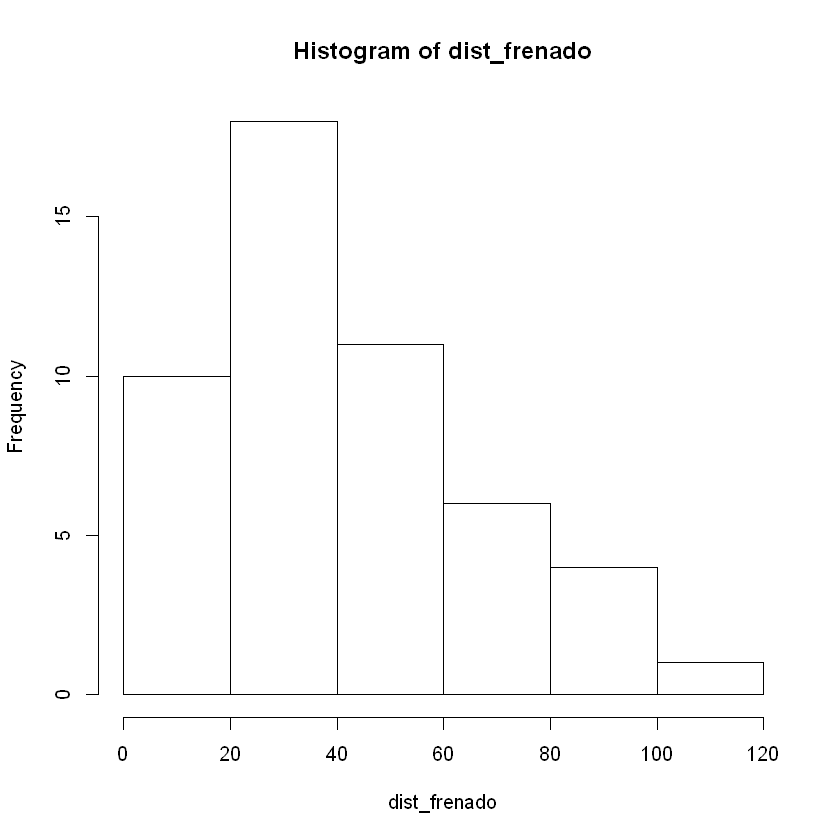

In [54]:
hist(dist_frenado)

Como era de esperar, tenemos simetría > 0, lo cual nos informa de que la distribución de las distancias de frenado presenta una cola a su derecha.

Por ejemplo, si analizamos la simetría para el caso de una distribución normal obtendremos valores cercanos al 0:

In [232]:
set.seed(1) # seleccionamos semilla para que el experimento sea reproducible
variable <- rnorm(100000)
skewness(rnorm(variable, mean = 0, sd = 0.1))

[1] -0.001212554

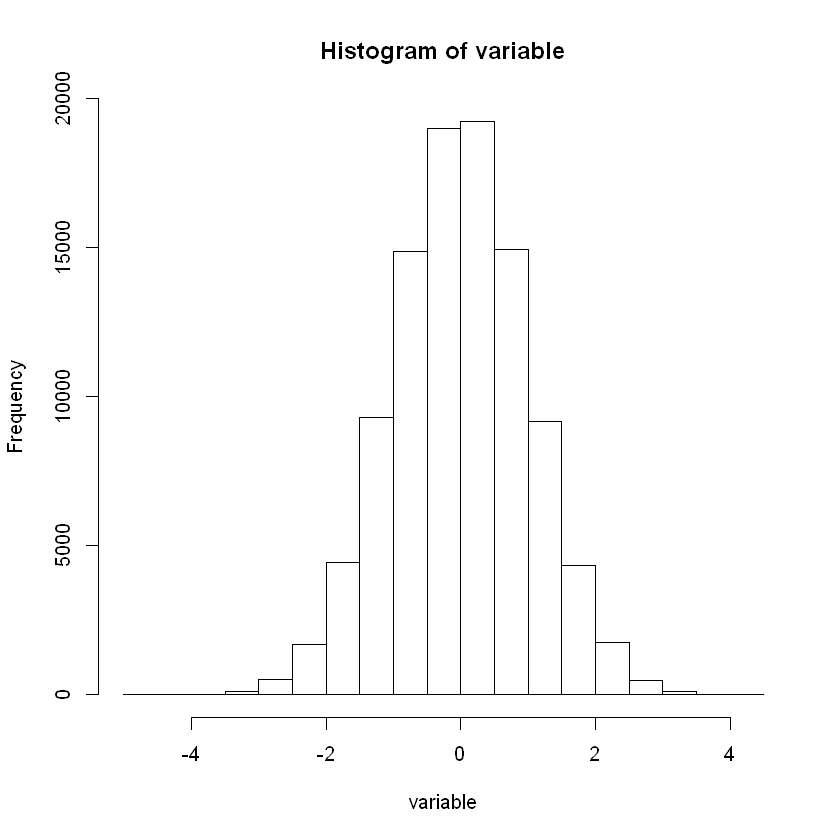

In [231]:
hist(variable)

También podemos analizar la curtosis, para ver el apuntamiento que existe alrededos de la media:

In [55]:
kurtosis(dist_frenado)

[1] 0.1193971

La curtosis en este caso es positiva porque sí que existe un cierto apuntamiento alredor de esta media.

Podemos ver otro ejemplo dónde esto no es así:

In [236]:
set.seed(1)
variable <- runif(100000)
kurtosis(variable)

[1] -1.204268

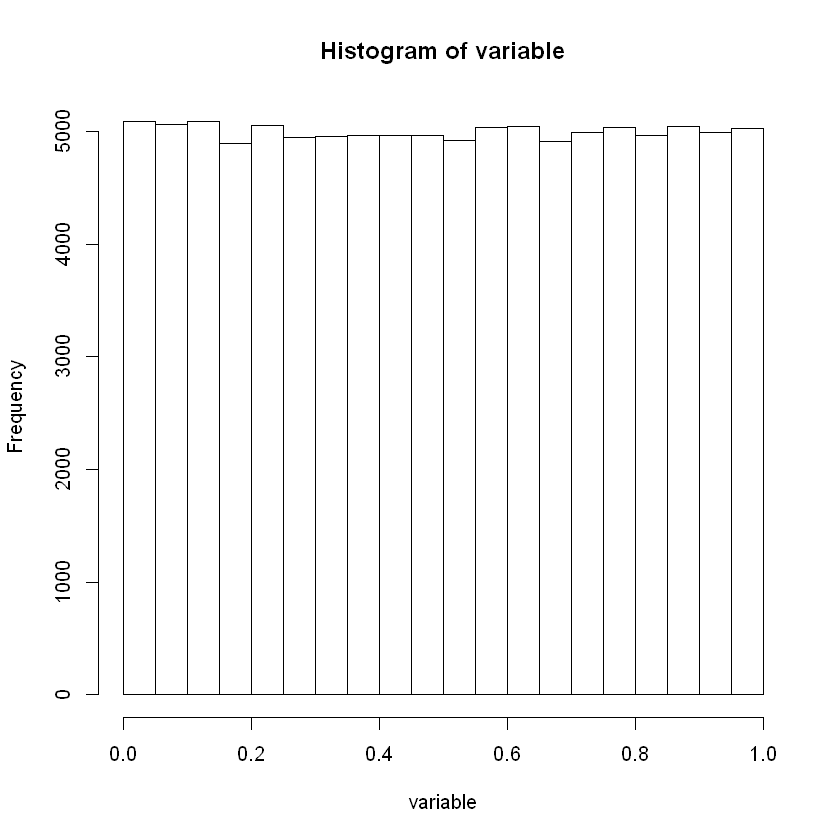

In [238]:
hist(variable)

Realizar este mismo análisis sobre la columna __speed__ del dataset __cars__.

#### Distribuciones de frecuencias:

In [239]:
X <- c(1, 2, 3, 4, 5)
n <- c(13, 39, 9, 3, 1)
datos <- data.frame(X, n)

In [240]:
head(datos)

X,n
1,13
2,39
3,9
4,3
5,1


__ejercicio:__

Calcular frecuencia relativa, frecuencia absoluta acumulada y la frecuencia relativa acumulada.